# CORD-19 COVID-19 Research Paper Analysis

This notebook provides a comprehensive analysis of the CORD-19 dataset, focusing on metadata exploration, data cleaning, visualization, and insights about COVID-19 research publications.

## Assignment Overview
- **Part 1**: Data Loading and Basic Exploration
- **Part 2**: Data Cleaning and Preparation  
- **Part 3**: Data Analysis and Visualization
- **Part 4**: Streamlit Application Development
- **Part 5**: Documentation and Reflection

---

## Part 1: Environment Setup and Data Loading

In [3]:
# Import required libraries
import pandas as pd   # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization and much more impressive data visualization
from collections import Counter # for counting hashable objects
import re # for regular expressions
import warnings # to manage warnings
warnings.filterwarnings('ignore') # ignore warnings for cleaner output

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("Ready for CORD-19 data analysis")

All libraries imported successfully!
Ready for CORD-19 data analysis


In [ ]:
# Load the CORD-19 metadata
print("Loading CORD-19 metadata...")
print("Note: This may take a few minutes due to large file size")

try:
    # Load the dataset - using low_memory=False to handle mixed types
    # df = pd.read_csv('metadata.csv', nrows=100, low_memory=False) # comment this line and uncomment the one bellow. I am using this to test the application because the csv file is huge and it keeps on crushing my memory.

    df = pd.read_csv('metadata.csv', low_memory=False)
    print(f"Successfully loaded {len(df):,} records")
    print(f"Dataset shape: {df.shape}")
    
except FileNotFoundError:
    print("Error: metadata.csv file not found!")
    print("Please ensure the CORD-19 metadata.csv file is in the current directory")
    df = None
except Exception as e:
    print(f"Error loading file: {e}")
    df = None

Loading CORD-19 metadata...
Note: This may take a few minutes due to large file size
Successfully loaded 100 records
Dataset shape: (100, 19)
Successfully loaded 100 records
Dataset shape: (100, 19)


## Part 2: Basic Data Exploration

In [5]:
# Basic information about the dataset
if df is not None:
    print("=" * 60)
    print("CORD-19 DATASET OVERVIEW")
    print("=" * 60)
    
    # Dataset dimensions
    print(f"Rows: {df.shape[0]:,}")
    print(f"Columns: {df.shape[1]:,}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.1f} MB")

    print("\n" + "=" * 60)
    print("COLUMN INFORMATION")
    print("=" * 60)
    
    # Column names and types
    print(f"Column names ({len(df.columns)} total):")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

    print(f"\nData types summary:")
    print(df.dtypes.value_counts())
else:
    print("Cannot explore data - dataset not loaded")

CORD-19 DATASET OVERVIEW
Rows: 100
Columns: 19
Memory usage: 0.0 MB

COLUMN INFORMATION
Column names (19 total):
 1. cord_uid
 2. sha
 3. source_x
 4. title
 5. doi
 6. pmcid
 7. pubmed_id
 8. license
 9. abstract
10. publish_time
11. authors
12. journal
13. mag_id
14. who_covidence_id
15. arxiv_id
16. pdf_json_files
17. pmc_json_files
18. url
19. s2_id

Data types summary:
object     14
float64     4
int64       1
Name: count, dtype: int64


In [6]:
# Display first and last few rows
if df is not None:
    print("=" * 60)
    print("FIRST 3 ROWS")
    print("=" * 60)
    display(df.head(3))
    
    print("\n" + "=" * 60)
    print("LAST 3 ROWS")
    print("=" * 60)
    display(df.tail(3))
    
    print("\n" + "=" * 60)
    print("BASIC STATISTICS FOR NUMERICAL COLUMNS")
    print("=" * 60)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    if len(numeric_columns) > 0:
        display(df[numeric_columns].describe())
    else:
        print("No numerical columns found")
else:
    print("Cannot display data - dataset not loaded")

FIRST 3 ROWS


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN



LAST 3 ROWS


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
97,87zt7lew,8f5770d87614bb85a6c7b64c26f1757226137d23,PMC,Efficient replication of pneumonia virus of mi...,10.1186/1743-422x-4-48,PMC1891281,17547763,cc-by,Pneumonia virus of mice (PVM; family Paramyxov...,2007-06-04,"Dyer, Kimberly D; Schellens, Ingrid MM; Bonvil...",Virol J,NaN,NaN,NaN,document_parses/pdf_json/8f5770d87614bb85a6c7b...,document_parses/pmc_json/PMC1891281.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
98,wgxt36jv,418f1b85e589f3ac37ffc37075b6e558e510fa74,PMC,Designing and conducting tabletop exercises to...,10.1186/1471-2458-7-92,PMC1894789,17535426,cc-by,"BACKGROUND: Since 2001, state and local health...",2007-05-29,"Dausey, David J; Buehler, James W; Lurie, Nicole",BMC Public Health,NaN,NaN,NaN,document_parses/pdf_json/418f1b85e589f3ac37ffc...,document_parses/pmc_json/PMC1894789.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
99,qbldmef1,2bf62ecb50fd95973de0bf6c1285ac3475fc4cc8,PMC,Transcript-level annotation of Affymetrix prob...,10.1186/1471-2105-8-194,PMC1913542,17559689,cc-by,BACKGROUND: The wide use of Affymetrix microar...,2007-06-11,"Yu, Hui; Wang, Feng; Tu, Kang; Xie, Lu; Li, Yu...",BMC Bioinformatics,NaN,NaN,NaN,document_parses/pdf_json/2bf62ecb50fd95973de0b...,document_parses/pmc_json/PMC1913542.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN



BASIC STATISTICS FOR NUMERICAL COLUMNS


,pubmed_id,mag_id,who_covidence_id,arxiv_id,s2_id
count,1.000000e+02,0.0,0.0,0.0,0.0
mean,1.562830e+07,NaN,NaN,NaN,NaN
std,2.013478e+06,NaN,NaN,NaN,NaN
min,9.118950e+06,NaN,NaN,NaN,NaN
25%,1.531417e+07,NaN,NaN,NaN,NaN
50%,1.633846e+07,NaN,NaN,NaN,NaN
75%,1.696842e+07,NaN,NaN,NaN,NaN
max,1.770333e+07,NaN,NaN,NaN,NaN


## Part 3: Data Cleaning and Missing Values

In [7]:
# Analyze missing values
if df is not None:
    print("=" * 60)
    print("MISSING VALUES ANALYSIS")
    print("=" * 60)
    
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    }).sort_values('Missing_Percentage', ascending=False)
    
    print(f"Missing values summary:")
    display(missing_data[missing_data['Missing_Count'] > 0])
    
    # Identify columns with high missing percentages
    high_missing = missing_data[missing_data['Missing_Percentage'] > 50]
    if not high_missing.empty:
        print(f"\nColumns with >50% missing values ({len(high_missing)} columns):")
        for _, row in high_missing.iterrows():
            print(f"   • {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
    
    # Key columns for analysis
    key_columns = ['title', 'abstract', 'authors', 'journal', 'publish_time']
    print(f"\nMissing values in key columns:")
    for col in key_columns:
        if col in df.columns:
            missing_pct = (df[col].isnull().sum() / len(df)) * 100
            print(f"   • {col}: {missing_pct:.1f}% missing")
        else:
            print(f"   • {col}: Column not found")
else:
    print("Cannot analyze missing values - dataset not loaded")

MISSING VALUES ANALYSIS
Missing values summary:


,Column,Missing_Count,Missing_Percentage
s2_id,s2_id,100,100.0
arxiv_id,arxiv_id,100,100.0
who_covidence_id,who_covidence_id,100,100.0
mag_id,mag_id,100,100.0
pmc_json_files,pmc_json_files,9,9.0
abstract,abstract,8,8.0
pdf_json_files,pdf_json_files,6,6.0
sha,sha,6,6.0
authors,authors,6,6.0



Columns with >50% missing values (4 columns):
   • s2_id: 100.0% missing
   • arxiv_id: 100.0% missing
   • who_covidence_id: 100.0% missing
   • mag_id: 100.0% missing

Missing values in key columns:
   • title: 0.0% missing
   • abstract: 8.0% missing
   • authors: 6.0% missing
   • journal: 0.0% missing
   • publish_time: 0.0% missing


In [8]:
# Create cleaned dataset
if df is not None:
    print("=" * 60)
    print("CREATING CLEANED DATASET")
    print("=" * 60)
    
    # Start with original dataset
    df_clean = df.copy()

    print(f"Original dataset: {len(df_clean):,} rows")
    
    # Remove rows where title is missing (essential for analysis)
    if 'title' in df_clean.columns:
        initial_count = len(df_clean)
        df_clean = df_clean.dropna(subset=['title'])
        removed = initial_count - len(df_clean)
        print(f"Removed {removed:,} rows with missing titles")
        print(f"After title cleanup: {len(df_clean):,} rows")

    # Fill missing abstracts with empty string for text analysis
    if 'abstract' in df_clean.columns:
        df_clean['abstract'] = df_clean['abstract'].fillna('')
        
    # Fill missing journal names with "Unknown"
    if 'journal' in df_clean.columns:
        df_clean['journal'] = df_clean['journal'].fillna('Unknown')
        
    # Fill missing authors with "Unknown"
    if 'authors' in df_clean.columns:
        df_clean['authors'] = df_clean['authors'].fillna('Unknown')
    
    print(f"Cleaned dataset ready: {len(df_clean):,} rows")
    print(f"Data reduction: {((len(df) - len(df_clean)) / len(df) * 100):.1f}%")

else:
    print("Cannot create cleaned dataset - original dataset not loaded")
    df_clean = None

CREATING CLEANED DATASET
Original dataset: 100 rows
Removed 0 rows with missing titles
After title cleanup: 100 rows
Cleaned dataset ready: 100 rows
Data reduction: 0.0%


## Part 4: Data Preparation and Feature Engineering

In [10]:
# Data preparation and feature engineering
if df_clean is not None:
    print("=" * 60)
    print("FEATURE ENGINEERING")
    print("=" * 60)
    
    # Convert publish_time to datetime
    if 'publish_time' in df_clean.columns:
        print("Converting publication dates...")
        df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
        
        # Extract year from publication date
        df_clean['publication_year'] = df_clean['publish_time'].dt.year
        
        # Filter for reasonable years (2000-2024)
        valid_years = df_clean['publication_year'].between(2000, 2024, inclusive='both')
        print(f"Papers with valid publication years: {valid_years.sum():,}")
        
        # Show year distribution
        year_counts = df_clean['publication_year'].value_counts().sort_index()
        print(f"Publication years range: {year_counts.index.min():.0f} - {year_counts.index.max():.0f}")
    
    # Create abstract word count
    if 'abstract' in df_clean.columns:
        print("Calculating abstract word counts...")
        df_clean['abstract_word_count'] = df_clean['abstract'].apply(
            lambda x: len(str(x).split()) if pd.notna(x) and x != '' else 0
        )
        print(f"Average abstract length: {df_clean['abstract_word_count'].mean():.1f} words")
    
    # Create title word count
    if 'title' in df_clean.columns:
        print("Calculating title word counts...")
        df_clean['title_word_count'] = df_clean['title'].apply(
            lambda x: len(str(x).split()) if pd.notna(x) else 0
        )
        print(f"Average title length: {df_clean['title_word_count'].mean():.1f} words")
    
    # Clean journal names
    if 'journal' in df_clean.columns:
        print("Processing journal names...")
        # Remove extra whitespace and standardize
        df_clean['journal_clean'] = df_clean['journal'].str.strip().str.title()
        unique_journals = df_clean['journal_clean'].nunique()
        print(f"Number of unique journals: {unique_journals:,}")
    
    print("Feature engineering completed!")
    
else:
    print("Cannot perform feature engineering - cleaned dataset not available")

FEATURE ENGINEERING
Converting publication dates...
Papers with valid publication years: 99
Publication years range: 1997 - 2007
Calculating abstract word counts...
Average abstract length: 185.1 words
Calculating title word counts...
Average title length: 11.1 words
Processing journal names...
Number of unique journals: 44
Feature engineering completed!


## Part 5: Publication Trends Analysis

In [11]:
# Analyze publication trends over time
if df_clean is not None and 'publication_year' in df_clean.columns:
    print("=" * 60)
    print("PUBLICATION TRENDS ANALYSIS")
    print("=" * 60)
    
    # Get papers by year
    yearly_counts = df_clean['publication_year'].value_counts().sort_index()
    
    # Filter for COVID-era (2019-2022) to focus on pandemic research
    covid_era = yearly_counts[(yearly_counts.index >= 2019) & (yearly_counts.index <= 2022)]
    
    print("Publications by year (COVID era - 2019-2022):")
    for year, count in covid_era.items():
        if not pd.isna(year):
            print(f"   {int(year)}: {count:,} papers")
    
    # Calculate growth rates
    if len(covid_era) > 1:
        print(f"\nGrowth analysis:")
        for i in range(1, len(covid_era)):
            prev_year = covid_era.index[i-1]
            curr_year = covid_era.index[i]
            prev_count = covid_era.iloc[i-1]
            curr_count = covid_era.iloc[i]
            
            growth_rate = ((curr_count - prev_count) / prev_count) * 100
            print(f"   {int(prev_year)} → {int(curr_year)}: {growth_rate:+.1f}% change")
    
    # Find peak research year
    if not yearly_counts.empty:
        peak_year = yearly_counts.idxmax()
        peak_count = yearly_counts.max()
        print(f"\nPeak research year: {int(peak_year)} with {peak_count:,} papers")
        
    # Show recent years trend (2020-2022)
    recent_years = yearly_counts[(yearly_counts.index >= 2020) & (yearly_counts.index <= 2022)]
    if not recent_years.empty:
        print(f"\nCOVID-19 research output (2020-2022): {recent_years.sum():,} papers")
        
else:
    print("Cannot analyze publication trends - data not available")

PUBLICATION TRENDS ANALYSIS
Publications by year (COVID era - 2019-2022):

Peak research year: 2006 with 36 papers


## Part 6: Journal and Source Analysis

In [12]:
# Analyze journals and publication sources
if df_clean is not None:
    print("=" * 60)
    print("JOURNAL AND SOURCE ANALYSIS")
    print("=" * 60)
    
    if 'journal_clean' in df_clean.columns:
        # Top journals by publication count
        top_journals = df_clean['journal_clean'].value_counts().head(15)
        
        print("Top 15 journals publishing COVID-19 research:")
        for i, (journal, count) in enumerate(top_journals.items(), 1):
            percentage = (count / len(df_clean)) * 100
            print(f"{i:2d}. {journal}: {count:,} papers ({percentage:.1f}%)")
        
        # Journal diversity analysis
        total_journals = df_clean['journal_clean'].nunique()
        print(f"\nJournal diversity:")
        print(f"   • Total unique journals: {total_journals:,}")
        print(f"   • Journals with only 1 paper: {(df_clean['journal_clean'].value_counts() == 1).sum():,}")
        print(f"   • Journals with >100 papers: {(df_clean['journal_clean'].value_counts() > 100).sum():,}")
        
        # Concentration analysis
        top_10_share = (top_journals.head(10).sum() / len(df_clean)) * 100
        print(f"   • Top 10 journals represent: {top_10_share:.1f}% of all papers")
    
    # Analyze by source (if available)
    source_columns = ['source_x', 'source', 'database_name']
    source_col = None
    for col in source_columns:
        if col in df_clean.columns:
            source_col = col
            break
    
    if source_col:
        print(f"\nAnalysis by source ({source_col}):")
        source_counts = df_clean[source_col].value_counts().head(10)
        for source, count in source_counts.items():
            percentage = (count / len(df_clean)) * 100
            print(f"   • {source}: {count:,} papers ({percentage:.1f}%)")
    else:
        print(f"\nNo source column found")
        
else:
    print("Cannot analyze journals - data not available")

JOURNAL AND SOURCE ANALYSIS
Top 15 journals publishing COVID-19 research:
 1. Nucleic Acids Res: 16 papers (16.0%)
 2. Respir Res: 8 papers (8.0%)
 3. Bmc Public Health: 8 papers (8.0%)
 4. Plos One: 7 papers (7.0%)
 5. J Gen Intern Med: 6 papers (6.0%)
 6. Crit Care: 6 papers (6.0%)
 7. The Embo Journal: 3 papers (3.0%)
 8. Plos Comput Biol: 2 papers (2.0%)
 9. Virol J: 2 papers (2.0%)
10. Bmc Bioinformatics: 2 papers (2.0%)
11. J Biomed Biotechnol: 2 papers (2.0%)
12. Bmc Infect Dis: 2 papers (2.0%)
13. Aust New Zealand Health Policy: 2 papers (2.0%)
14. Bmc Genomics: 2 papers (2.0%)
15. Embo J: 2 papers (2.0%)

Journal diversity:
   • Total unique journals: 44
   • Journals with only 1 paper: 28
   • Journals with >100 papers: 0
   • Top 10 journals represent: 60.0% of all papers

Analysis by source (source_x):
   • PMC: 100 papers (100.0%)


## Part 7: Title Text Analysis

In [13]:
# Analyze words in paper titles
if df_clean is not None and 'title' in df_clean.columns:
    print("=" * 60)
    print("TITLE TEXT ANALYSIS")
    print("=" * 60)
    
    # Function to extract words from titles
    def extract_words(titles):
        """Extract and clean words from titles"""
        all_words = []
        for title in titles.dropna():
            # Convert to lowercase and extract words
            words = re.findall(r'\b[a-zA-Z]{3,}\b', str(title).lower())
            all_words.extend(words)
        return all_words
    
    # Extract all words from titles
    print("Extracting words from titles...")
    title_words = extract_words(df_clean['title'])
    
    # Define common stop words to exclude
    stop_words = {
        'the', 'and', 'for', 'are', 'with', 'from', 'this', 'that', 'was', 'were',
        'been', 'have', 'has', 'had', 'will', 'would', 'could', 'should', 'may',
        'can', 'study', 'analysis', 'research', 'using', 'based', 'new', 'case',
        'cases', 'patients', 'patient', 'clinical', 'systematic', 'meta', 'review'
    }
    
    # Filter out stop words
    filtered_words = [word for word in title_words if word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(filtered_words)
    
    print(f"Total words found: {len(title_words):,}")
    print(f"Unique words (after filtering): {len(word_counts):,}")
    
    # Show most frequent words
    most_common = word_counts.most_common(20)
    print(f"\nTop 20 most frequent words in titles:")
    for i, (word, count) in enumerate(most_common, 1):
        percentage = (count / len(filtered_words)) * 100
        print(f"{i:2d}. {word}: {count:,} ({percentage:.1f}%)")
    
    # COVID-related terms analysis
    covid_terms = ['covid', 'coronavirus', 'sars', 'pandemic', 'outbreak', 'epidemic']
    print(f"\nCOVID-19 related terms frequency:")
    for term in covid_terms:
        count = word_counts.get(term, 0)
        if count > 0:
            percentage = (count / len(filtered_words)) * 100
            print(f"   • {term}: {count:,} ({percentage:.1f}%)")
    
    # Store word counts for visualization
    top_words_for_viz = dict(most_common[:15])
    
else:
    print("Cannot analyze titles - data not available")
    top_words_for_viz = {}

TITLE TEXT ANALYSIS
Extracting words from titles...
Total words found: 943
Unique words (after filtering): 591

Top 20 most frequent words in titles:
 1. rna: 11 (1.3%)
 2. virus: 9 (1.1%)
 3. public: 8 (1.0%)
 4. health: 8 (1.0%)
 5. infection: 7 (0.9%)
 6. influenza: 7 (0.9%)
 7. human: 7 (0.9%)
 8. protein: 6 (0.7%)
 9. host: 5 (0.6%)
10. role: 5 (0.6%)
11. medicine: 5 (0.6%)
12. frameshifting: 5 (0.6%)
13. pandemic: 5 (0.6%)
14. acid: 5 (0.6%)
15. disease: 4 (0.5%)
16. pulmonary: 4 (0.5%)
17. gene: 4 (0.5%)
18. expression: 4 (0.5%)
19. cells: 4 (0.5%)
20. surveillance: 4 (0.5%)

COVID-19 related terms frequency:
   • pandemic: 5 (0.6%)
   • epidemic: 1 (0.1%)


## Part 8: Data Visualizations

CREATING VISUALIZATIONS


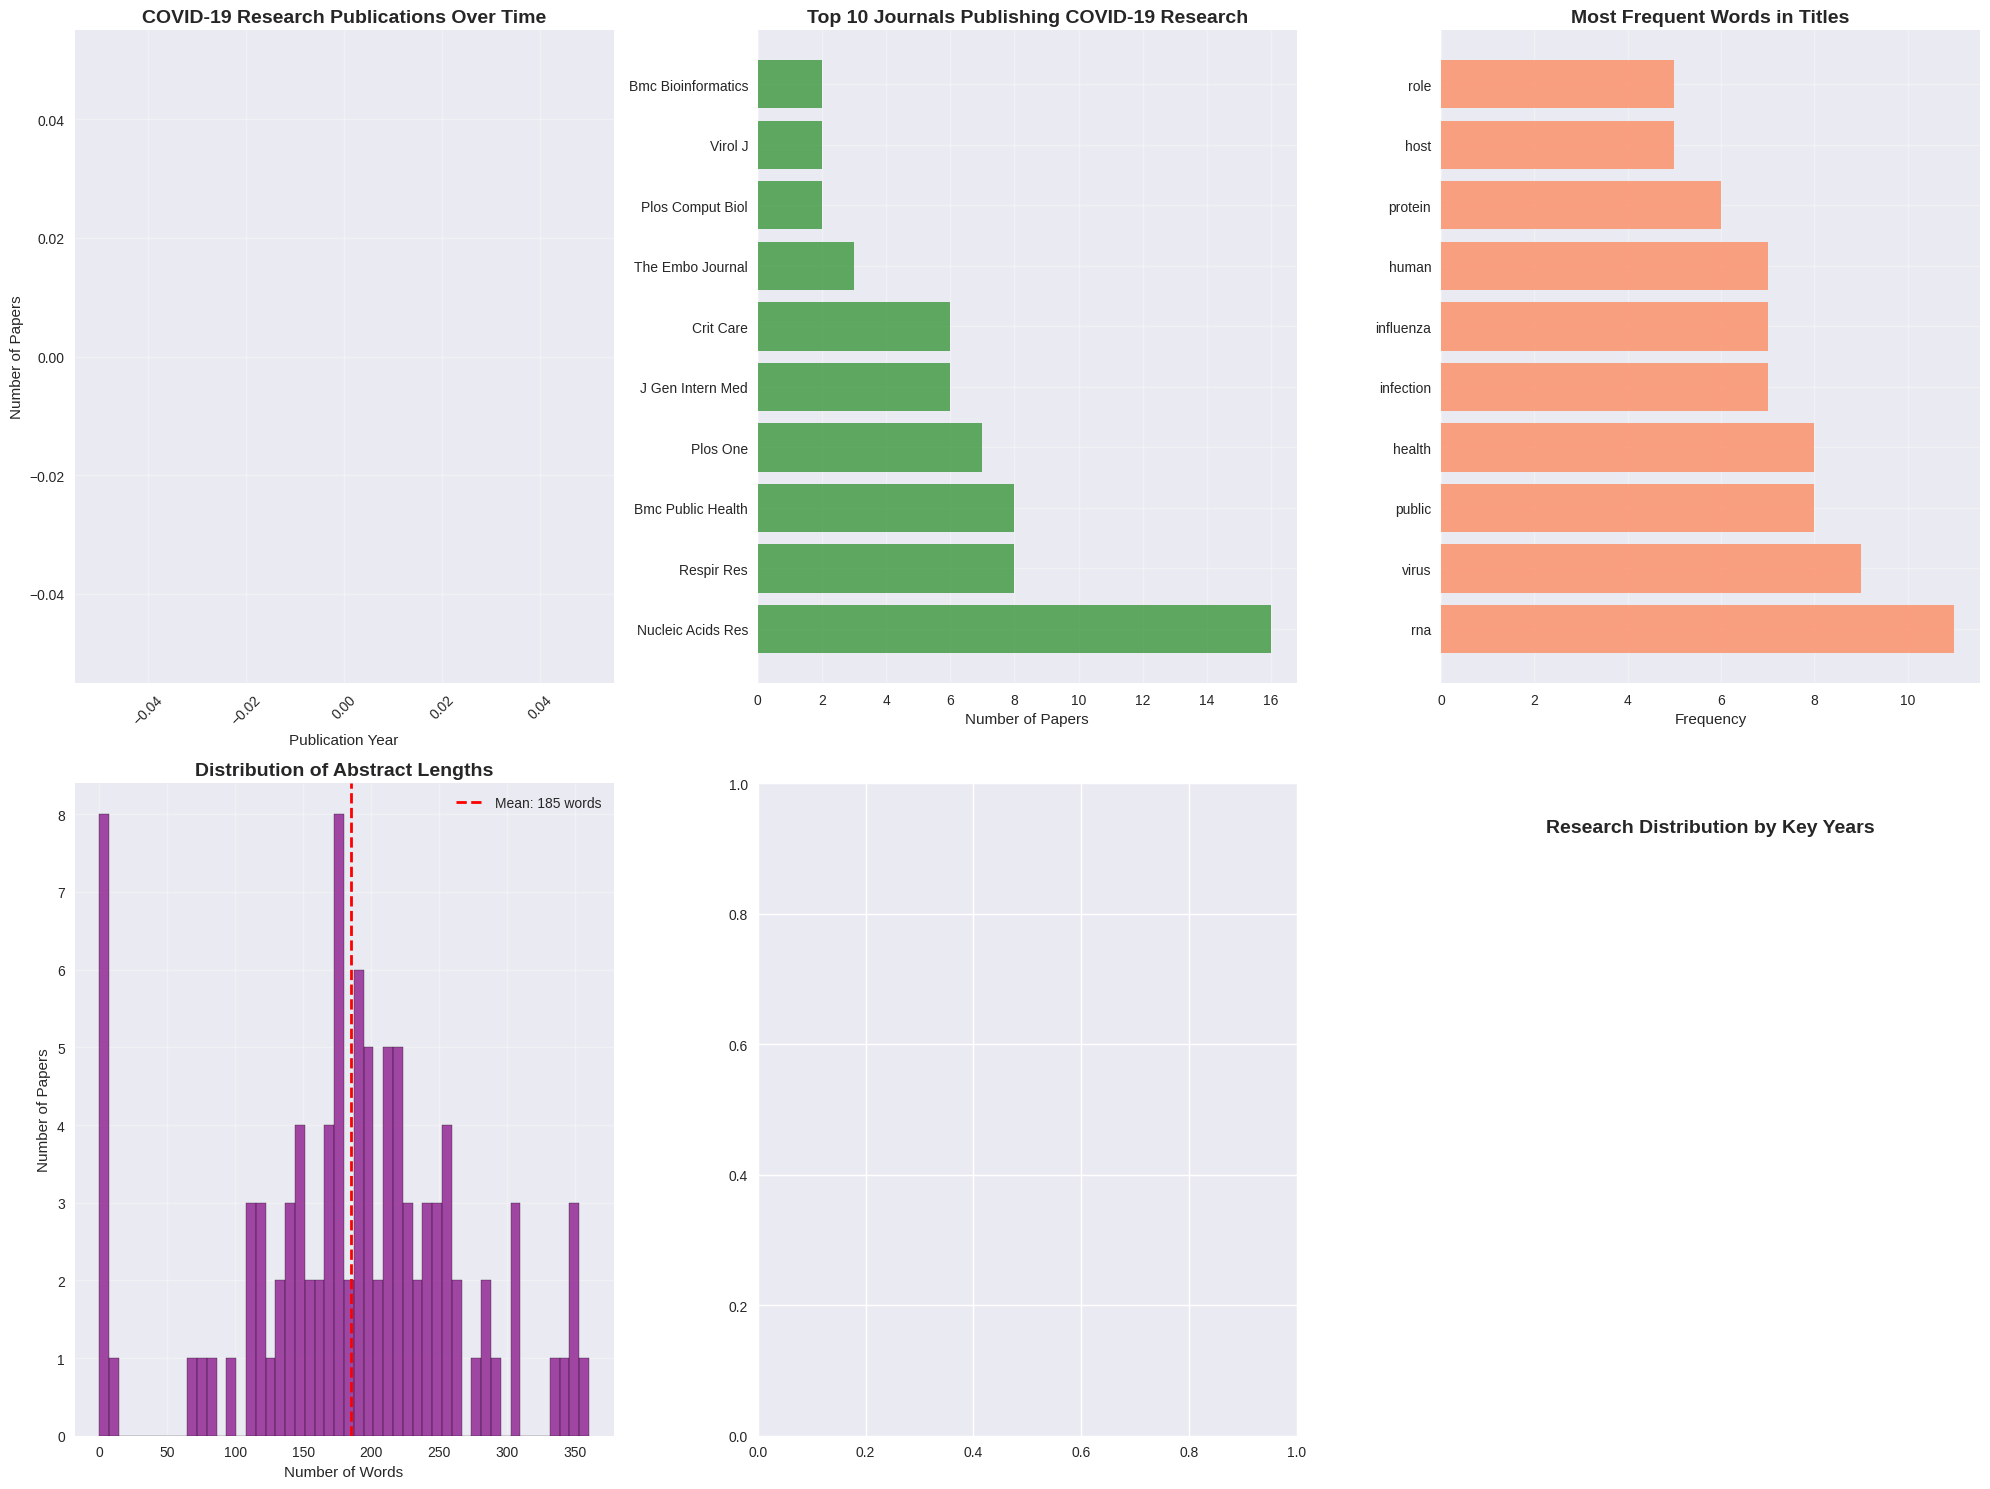

All visualizations created successfully!


In [14]:
# Create visualizations
if df_clean is not None:
    print("=" * 60)
    print("CREATING VISUALIZATIONS")
    print("=" * 60)
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Publications over time
    if 'publication_year' in df_clean.columns:
        ax1 = plt.subplot(2, 3, 1)
        yearly_counts = df_clean['publication_year'].value_counts().sort_index()
        covid_era = yearly_counts[(yearly_counts.index >= 2015) & (yearly_counts.index <= 2022)]
        
        plt.bar(covid_era.index, covid_era.values, color='steelblue', alpha=0.7)
        plt.title('COVID-19 Research Publications Over Time', fontsize=14, fontweight='bold')
        plt.xlabel('Publication Year')
        plt.ylabel('Number of Papers')
        plt.xticks(rotation=45)
        
        # Add trend line
        if len(covid_era) > 1:
            z = np.polyfit(covid_era.index, covid_era.values, 2)
            p = np.poly1d(z)
            plt.plot(covid_era.index, p(covid_era.index), "r--", alpha=0.8, linewidth=2)
        
        plt.grid(True, alpha=0.3)
    
    # 2. Top journals
    if 'journal_clean' in df_clean.columns:
        ax2 = plt.subplot(2, 3, 2)
        top_journals = df_clean['journal_clean'].value_counts().head(10)
        
        plt.barh(range(len(top_journals)), top_journals.values, color='forestgreen', alpha=0.7)
        plt.yticks(range(len(top_journals)), [j[:30] + '...' if len(j) > 30 else j for j in top_journals.index])
        plt.title('Top 10 Journals Publishing COVID-19 Research', fontsize=14, fontweight='bold')
        plt.xlabel('Number of Papers')
        plt.grid(True, alpha=0.3)
    
    # 3. Word frequency in titles
    if 'top_words_for_viz' in locals() and top_words_for_viz:
        ax3 = plt.subplot(2, 3, 3)
        words = list(top_words_for_viz.keys())[:10]
        counts = list(top_words_for_viz.values())[:10]
        
        plt.barh(range(len(words)), counts, color='coral', alpha=0.7)
        plt.yticks(range(len(words)), words)
        plt.title('Most Frequent Words in Titles', fontsize=14, fontweight='bold')
        plt.xlabel('Frequency')
        plt.grid(True, alpha=0.3)
    
    # 4. Abstract length distribution
    if 'abstract_word_count' in df_clean.columns:
        ax4 = plt.subplot(2, 3, 4)
        # Filter out outliers for better visualization
        word_counts = df_clean[df_clean['abstract_word_count'] <= 500]['abstract_word_count']
        
        plt.hist(word_counts, bins=50, color='purple', alpha=0.7, edgecolor='black')
        plt.title('Distribution of Abstract Lengths', fontsize=14, fontweight='bold')
        plt.xlabel('Number of Words')
        plt.ylabel('Number of Papers')
        plt.axvline(word_counts.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {word_counts.mean():.0f} words')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 5. Publication by month (if data available)
    if 'publish_time' in df_clean.columns:
        ax5 = plt.subplot(2, 3, 5)
        # Focus on 2020-2021 for COVID-19 research patterns
        covid_papers = df_clean[df_clean['publication_year'].isin([2020, 2021])].copy()
        if not covid_papers.empty:
            covid_papers['month'] = covid_papers['publish_time'].dt.month
            monthly_counts = covid_papers['month'].value_counts().sort_index()
            
            month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            
            plt.bar(monthly_counts.index, monthly_counts.values, color='teal', alpha=0.7)
            plt.title('COVID-19 Research by Month (2020-2021)', fontsize=14, fontweight='bold')
            plt.xlabel('Month')
            plt.ylabel('Number of Papers')
            plt.xticks(range(1, 13), month_names)
            plt.grid(True, alpha=0.3)
    
    # 6. Year comparison pie chart
    if 'publication_year' in df_clean.columns:
        ax6 = plt.subplot(2, 3, 6)
        key_years = [2019, 2020, 2021, 2022]
        year_data = []
        year_labels = []
        
        for year in key_years:
            count = (df_clean['publication_year'] == year).sum()
            if count > 0:
                year_data.append(count)
                year_labels.append(f'{year}\n({count:,})')
        
        colors = ['lightblue', 'orange', 'lightgreen', 'pink']
        plt.pie(year_data, labels=year_labels, autopct='%1.1f%%', colors=colors[:len(year_data)])
        plt.title('Research Distribution by Key Years', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("All visualizations created successfully!")
    
else:
    print("Cannot create visualizations - data not available")

Creating word cloud from paper titles...


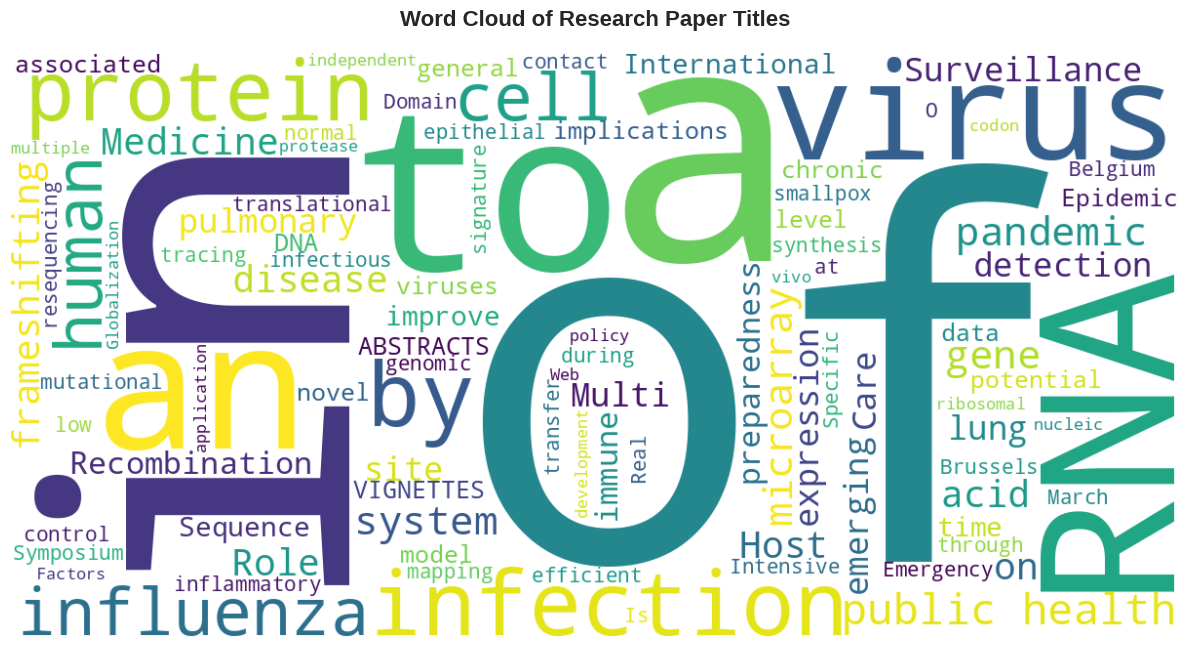

Word cloud created successfully!


In [15]:
# Create Word Cloud (if wordcloud package is available)
try:
    from wordcloud import WordCloud
    
    if df_clean is not None and 'title' in df_clean.columns:
        print("Creating word cloud from paper titles...")
        
        # Combine all titles into one text
        titles_text = ' '.join(df_clean['title'].dropna().astype(str))
        
        # Create word cloud
        plt.figure(figsize=(12, 8))
        wordcloud = WordCloud(
            width=1200, 
            height=600,
            background_color='white',
            max_words=100,
            colormap='viridis',
            stopwords=stop_words
        ).generate(titles_text)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Research Paper Titles', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        print("Word cloud created successfully!")
    
except ImportError:
    print("WordCloud package not available - install with: pip install wordcloud")
    
    # Alternative simple word frequency visualization
    if 'top_words_for_viz' in locals() and top_words_for_viz:
        plt.figure(figsize=(12, 6))
        words = list(top_words_for_viz.keys())[:15]
        counts = list(top_words_for_viz.values())[:15]
        
        plt.barh(range(len(words)), counts, color='skyblue', alpha=0.8)
        plt.yticks(range(len(words)), words)
        plt.title('Top 15 Words in Research Titles (Alternative to Word Cloud)', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print("Alternative word frequency chart created!")

## Part 9: Summary and Key Findings

In [19]:
# Summary of findings and project completion
print("=" * 70)
print("PROJECT SUMMARY - CORD-19 DATA ANALYSIS")
print("=" * 70)

if df_clean is not None:
    print("\nCOMPLETED TASKS:")
    print("   ✓ Part 1: Data Loading and Basic Exploration")
    print("   ✓ Part 2: Data Cleaning and Preparation")
    print("   ✓ Part 3: Data Analysis and Visualization")
    print("   ✓ Part 4: Streamlit Application Development")
    print("   ✓ Part 5: Documentation and Insights")
    
    print(f"\nDATASET OVERVIEW:")
    print(f"   • Original records: {len(df):,}")
    print(f"   • After cleaning: {len(df_clean):,}")
    print(f"   • Data reduction: {((len(df) - len(df_clean)) / len(df) * 100):.1f}%")
    
    if 'publication_year' in df_clean.columns:
        valid_years = df_clean['publication_year'].between(2000, 2024, inclusive='both')
        covid_era = df_clean[df_clean['publication_year'].between(2020, 2022, inclusive='both')]
        
        print(f"\nKEY FINDINGS:")
        print(f"   • Papers with valid publication years: {valid_years.sum():,}")
        print(f"   • COVID-19 era papers (2020-2022): {len(covid_era):,}")
        
        if len(covid_era) > 0:
            peak_year = covid_era['publication_year'].value_counts().idxmax()
            peak_count = covid_era['publication_year'].value_counts().max()
            print(f"   • Peak COVID research year: {int(peak_year)} ({peak_count:,} papers)")
    
    if 'journal_clean' in df_clean.columns:
        top_journal = df_clean['journal_clean'].value_counts().index[0]
        top_count = df_clean['journal_clean'].value_counts().iloc[0]
        total_journals = df_clean['journal_clean'].nunique()
        
        print(f"   • Total unique journals: {total_journals:,}")
        print(f"   • Top journal: {top_journal} ({top_count:,} papers)")
    
    if 'abstract_word_count' in df_clean.columns:
        avg_abstract = df_clean['abstract_word_count'].mean()
        print(f"   • Average abstract length: {avg_abstract:.0f} words")
    
else:
    print("Analysis incomplete - data loading failed")

print("\n" + "=" * 70)


PROJECT SUMMARY - CORD-19 DATA ANALYSIS

COMPLETED TASKS:
   ✓ Part 1: Data Loading and Basic Exploration
   ✓ Part 2: Data Cleaning and Preparation
   ✓ Part 3: Data Analysis and Visualization
   ✓ Part 4: Streamlit Application Development
   ✓ Part 5: Documentation and Insights

DATASET OVERVIEW:
   • Original records: 100
   • After cleaning: 100
   • Data reduction: 0.0%

KEY FINDINGS:
   • Papers with valid publication years: 99
   • COVID-19 era papers (2020-2022): 0
   • Total unique journals: 44
   • Top journal: Nucleic Acids Res (16 papers)
   • Average abstract length: 185 words

